In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [2]:
os.listdir()

['.ipynb_checkpoints', 'Udemy_Analytics.ipynb', 'Udemy_Courses.csv']

In [3]:
df = pd.read_csv('Udemy_Courses.csv')

In [4]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [6]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [7]:
df.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [8]:
df['content_duration_time'] = df['content_duration'].apply(lambda x: x.split()[0])

In [9]:
df['content_duration_time'] = pd.to_numeric(df['content_duration_time'])

In [10]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [11]:
df.dtypes

course_id                              int64
course_title                          object
is_paid                                 bool
price                                 object
num_subscribers                        int64
num_reviews                            int64
num_lectures                           int64
level                                 object
content_duration                      object
published_timestamp      datetime64[ns, UTC]
subject                               object
content_duration_time                float64
dtype: object

In [12]:
df.nunique()

course_id                3676
course_title             3667
is_paid                     2
price                      38
num_subscribers          2198
num_reviews               511
num_lectures              229
level                       4
content_duration          109
published_timestamp      3676
subject                     4
content_duration_time      96
dtype: int64

In [13]:
df.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [14]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [15]:
sorted_df = df.sort_values(by="num_subscribers", ascending=False)

In [16]:
sorted_df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development,10.5
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development,3.5
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development,43.0
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development,3.0
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development,30.5


In [17]:
sorted_df[sorted_df['content_duration'].str.contains('min')]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time
2470,249126,Logo Design Essentials,True,20,33205,481,12,All Levels,42 mins,2014-06-30 03:09:27+00:00,Graphic Design,42.0
2352,22445,Learn to Design a Letterhead - A Beginners Course,False,Free,24687,423,13,All Levels,44 mins,2012-10-10 23:34:55+00:00,Graphic Design,44.0
2616,756914,MongooseJS Essentials - Learn MongoDB for Node.js,False,Free,21682,1106,8,Beginner Level,44 mins,2016-03-12 16:04:28+00:00,Web Development,44.0
1930,583752,Introduction to Piano - By PGN Piano!,False,Free,14922,772,8,Beginner Level,40 mins,2015-08-16 20:38:49+00:00,Musical Instruments,40.0
3070,1023062,Serverless Architecture on Amazon Web Services,False,Free,13210,978,8,Intermediate Level,33 mins,2016-11-30 00:11:26+00:00,Web Development,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18 17:56:36+00:00,Graphic Design,37.0
2350,371900,Learn to create Text fire effect in Adobe Phot...,True,20,0,0,8,All Levels,36 mins,2014-12-19 23:19:47+00:00,Graphic Design,36.0
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22 17:14:43+00:00,Musical Instruments,32.0
2070,1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,31 mins,2017-05-16 14:55:28+00:00,Business Finance,31.0


In [18]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,1.5
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,1.0
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,1.5
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,1.0
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,37.0


In [19]:
sorted_df['m_h'] = sorted_df['content_duration'].apply(lambda x: x.split()[1] if len(x.split()) > 1 else "")

In [20]:
sorted_df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time,m_h
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development,10.5,hours
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development,3.5,hours
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development,43.0,hours
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development,3.0,hours
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development,30.5,hours


In [21]:
sorted_df.m_h.unique()

array(['hours', 'hour', 'mins', 'questions', ''], dtype=object)

In [22]:
len(sorted_df)

3682

In [23]:
new_sorted_df = sorted_df[sorted_df['m_h'].isin(['hours', 'hour', 'mins'])]

In [24]:
len(new_sorted_df)

3677

In [25]:
new_sorted_df.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject', 'content_duration_time', 'm_h'],
      dtype='object')

In [26]:
new_sorted_df['content_duration_time'].astype(float)

2230    10.5
776      3.5
3385    43.0
640      3.0
3316    30.5
        ... 
2290    32.0
1267     2.0
2070    31.0
1931     2.0
3165    37.0
Name: content_duration_time, Length: 3677, dtype: float64

In [27]:
hours_frame = new_sorted_df[new_sorted_df['m_h'].isin(['hours', 'hour'])]

In [28]:
mins_frame = new_sorted_df[new_sorted_df['m_h'] == 'mins']

In [29]:
mins_frame['content_duration_time'] = mins_frame['content_duration_time'].apply(lambda x: round(x/60, 2))

C:\Users\hp\anaconda3\envs\DataScience\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [30]:
mins_frame

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time,m_h
2470,249126,Logo Design Essentials,True,20,33205,481,12,All Levels,42 mins,2014-06-30 03:09:27+00:00,Graphic Design,0.70,mins
2352,22445,Learn to Design a Letterhead - A Beginners Course,False,Free,24687,423,13,All Levels,44 mins,2012-10-10 23:34:55+00:00,Graphic Design,0.73,mins
2616,756914,MongooseJS Essentials - Learn MongoDB for Node.js,False,Free,21682,1106,8,Beginner Level,44 mins,2016-03-12 16:04:28+00:00,Web Development,0.73,mins
1930,583752,Introduction to Piano - By PGN Piano!,False,Free,14922,772,8,Beginner Level,40 mins,2015-08-16 20:38:49+00:00,Musical Instruments,0.67,mins
3070,1023062,Serverless Architecture on Amazon Web Services,False,Free,13210,978,8,Intermediate Level,33 mins,2016-11-30 00:11:26+00:00,Web Development,0.55,mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18 17:56:36+00:00,Graphic Design,0.62,mins
2350,371900,Learn to create Text fire effect in Adobe Phot...,True,20,0,0,8,All Levels,36 mins,2014-12-19 23:19:47+00:00,Graphic Design,0.60,mins
2290,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22 17:14:43+00:00,Musical Instruments,0.53,mins
2070,1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,31 mins,2017-05-16 14:55:28+00:00,Business Finance,0.52,mins


In [31]:
full_frame = pd.concat([hours_frame,mins_frame])

In [32]:
full_frame = full_frame.reset_index()

In [33]:
full_frame.drop(columns=['index','m_h'])

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time
0,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development,10.50
1,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development,3.50
2,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development,43.00
3,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development,3.00
4,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...
3672,726314,Create Beautiful Image Maps for Your Website,True,20,0,0,8,Intermediate Level,37 mins,2016-01-18 17:56:36+00:00,Graphic Design,0.62
3673,371900,Learn to create Text fire effect in Adobe Phot...,True,20,0,0,8,All Levels,36 mins,2014-12-19 23:19:47+00:00,Graphic Design,0.60
3674,1223240,Learn Pirates of the Caribbean by Ear on the P...,True,20,0,0,6,All Levels,32 mins,2017-05-22 17:14:43+00:00,Musical Instruments,0.53
3675,1215926,Kickstarter success in 5 easy steps,True,20,0,0,12,All Levels,31 mins,2017-05-16 14:55:28+00:00,Business Finance,0.52


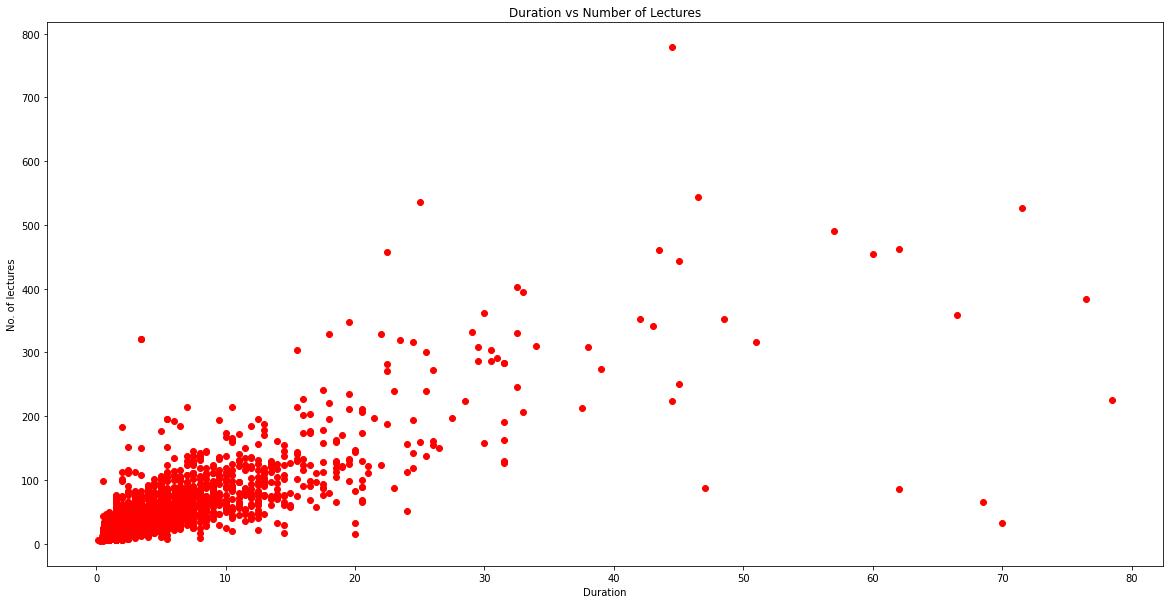

In [34]:
figure = plt.figure(figsize=(20,10))
plt.scatter(full_frame['content_duration_time'], full_frame['num_lectures'], c='red')
plt.xlabel('Duration')
plt.ylabel('No. of lectures')
plt.title('Duration vs Number of Lectures')
plt.show()

In [35]:
paid_frame = full_frame.groupby('is_paid').count().reset_index()

In [36]:
paid_frame

,is_paid,index,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time,m_h
0,False,310,310,310,310,310,310,310,310,310,310,310,310,310
1,True,3367,3367,3367,3367,3367,3367,3367,3367,3367,3367,3367,3367,3367


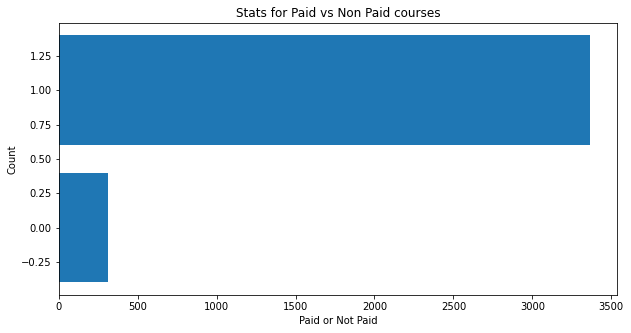

In [37]:
figure = plt.figure(figsize=(10,5))
plt.barh(paid_frame['is_paid'], paid_frame['course_id'])
plt.xlabel("Paid or Not Paid")
plt.ylabel("Count")
plt.title("Stats for Paid vs Non Paid courses")
plt.show()

In [38]:
full_frame['price'] = full_frame['price'].apply(lambda x: '0' if x == "Free" else x)

In [39]:
full_frame['price'] = pd.to_numeric(full_frame['price'])

In [40]:
grouped_frame = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews']].sum()

In [41]:
grouped_mean_frame = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews']].mean()

In [42]:
grouped_max_frame = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews']].max()

In [43]:
grouped_min_frame = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews']].min()

In [44]:
grouped_frame = grouped_frame.reset_index()

In [45]:
grouped_frame

,subject,level,price,num_subscribers,num_lectures,num_reviews
0,Business Finance,All Levels,52320,1047208,25841,39736
1,Business Finance,Beginner Level,18150,647007,9329,28242
2,Business Finance,Expert Level,2975,30146,613,1167
3,Business Finance,Intermediate Level,8455,144350,2972,6757
4,Graphic Design,All Levels,18685,688332,10644,19456
5,Graphic Design,Beginner Level,12995,315757,7127,15784
6,Graphic Design,Expert Level,350,1008,169,57
7,Graphic Design,Intermediate Level,2840,58051,1389,1773
8,Musical Instruments,All Levels,15450,328170,11754,16787
9,Musical Instruments,Beginner Level,12840,429030,9946,10347


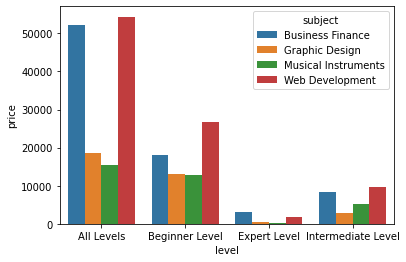

In [46]:
import seaborn as sns

ax = sns.barplot(x="level", y="price", hue="subject", data=grouped_frame)

In [47]:
grouped_frame.corr()

,price,num_subscribers,num_lectures,num_reviews
price,1.000000,0.800708,0.967475,0.746132
num_subscribers,0.800708,1.000000,0.887139,0.952896
num_lectures,0.967475,0.887139,1.000000,0.866429
num_reviews,0.746132,0.952896,0.866429,1.000000


In [48]:
new_grouped_frame = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews', 'content_duration_time']].sum()

In [49]:
new_grouped_frame

price  num_subscribers  num_lectures  \
subject             level                                                      
Business Finance    All Levels          52320          1047208         25841   
                    Beginner Level      18150           647007          9329   
                    Expert Level         2975            30146           613   
                    Intermediate Level   8455           144350          2972   
Graphic Design      All Levels          18685           688332         10644   
                    Beginner Level      12995           315757          7127   
                    Expert Level          350             1008           169   
                    Intermediate Level   2840            58051          1389   
Musical Instruments All Levels          15450           328170         11754   
                    Beginner Level      12840           429030          9946   
                    Expert Level          255             5431           276   
                    Intermediate Level   5155            84058          4079   
Web Development     All Levels          54385          4851366         40459   
                    Beginner Level      26730          2660049         15506   
                    Expert Level         1705            13611           727   
                    Intermediate Level   9620           455546          6689   

                                        num_reviews  content_duration_time  
subject             level                                                   
Business Finance    All Levels                39736                2862.19  
                    Beginner Level            28242                 961.43  
                    Expert Level               1167                  58.52  
                    Intermediate Level         6757                 363.72  
Graphic Design      All Levels                19456                1208.38  
                    Beginner Level            15784                 765.64  
                    Expert Level                 57                  23.00  
                    Intermediate Level         1773                 162.06  
Musical Instruments All Levels                16787                 884.95  
                    Beginner Level            10347                 720.55  
                    Expert Level                148                  18.00  
                    Intermediate Level         4442                 317.47  
Web Development     All Levels               328318                4438.05  
                    Beginner Level            74702                1478.21  
                    Expert Level                961                  69.00  
                    Intermediate Level        26044                 728.50

In [50]:
corr_frame = new_grouped_frame.corr()

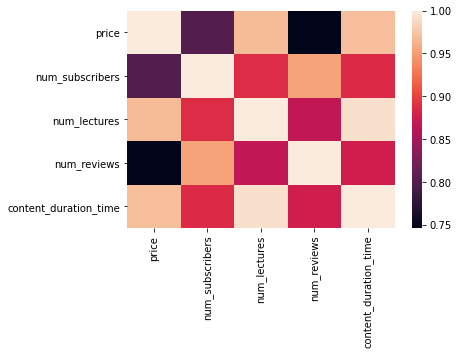

In [51]:
ax = sns.heatmap(data=corr_frame)

In [52]:
full_frame['published_m_y'] = full_frame['published_timestamp'].dt.strftime('%Y-%m')

In [53]:
full_frame.head()

,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time,m_h,published_m_y
0,2230,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5 hours,2013-02-14 07:03:41+00:00,Web Development,10.5,hours,2013-02
1,776,59014,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5 hours,2013-06-09 15:51:55+00:00,Web Development,3.5,hours,2013-06
2,3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02 21:13:27+00:00,Web Development,43.0,hours,2015-11
3,640,173548,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3 hours,2014-04-08 16:21:30+00:00,Web Development,3.0,hours,2014-04
4,3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08 22:28:36+00:00,Web Development,30.5,hours,2016-03


In [54]:
full_frame = full_frame.sort_values(by="published_m_y", ascending=True).reset_index()

In [55]:
full_frame.head()

,level_0,index,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,content_duration_time,m_h,published_m_y
0,664,1998,8324,Javascript for Beginners,True,20,3697,195,48,All Levels,3 hours,2011-07-09 05:43:31+00:00,Web Development,3.0,hours,2011-07
1,181,1743,8325,HTML Tutorial: HTML & CSS for Beginners,True,20,12458,253,82,All Levels,4 hours,2011-09-09 15:28:59+00:00,Web Development,4.0,hours,2011-09
2,373,2244,11153,Learn jQuery: An In-depth Course For Beginners,True,50,7014,95,62,All Levels,4.5 hours,2011-11-29 01:29:11+00:00,Web Development,4.5,hours,2011-11
3,15,447,11174,Become a Web Developer from Scratch,True,120,69186,2408,197,All Levels,27.5 hours,2011-11-19 21:51:20+00:00,Web Development,27.5,hours,2011-11
4,61,431,11475,Become a Certified Web Developer,True,100,26673,1090,185,All Levels,12 hours,2011-12-20 15:29:25+00:00,Web Development,12.0,hours,2011-12


In [56]:
full_frame.dtypes

level_0                                int64
index                                  int64
course_id                              int64
course_title                          object
is_paid                                 bool
price                                  int64
num_subscribers                        int64
num_reviews                            int64
num_lectures                           int64
level                                 object
content_duration                      object
published_timestamp      datetime64[ns, UTC]
subject                               object
content_duration_time                float64
m_h                                   object
published_m_y                         object
dtype: object

In [57]:
time_Series = full_frame.groupby(full_frame['published_timestamp'].dt.date)[['price', 'num_subscribers', 'num_reviews', 'num_lectures']].sum()

In [58]:
time_Series.reset_index()

,published_timestamp,price,num_subscribers,num_reviews,num_lectures
0,2011-07-09,20,3697,195,48
1,2011-09-09,20,12458,253,82
2,2011-11-19,120,69186,2408,197
3,2011-11-29,50,7014,95,62
4,2011-12-20,100,26673,1090,185
...,...,...,...,...,...
1205,2017-07-02,80,375,0,79
1206,2017-07-03,915,899,19,255
1207,2017-07-04,235,20,1,55
1208,2017-07-05,415,1,0,94


<AxesSubplot:xlabel='published_timestamp', ylabel='num_subscribers'>

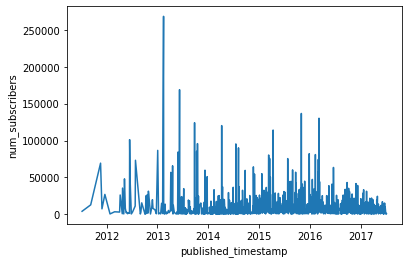

In [59]:
sns.lineplot(data=time_Series, x="published_timestamp", y="num_subscribers")

<AxesSubplot:xlabel='published_timestamp', ylabel='price'>

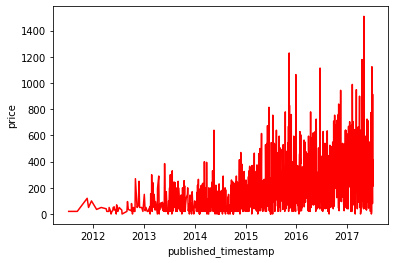

In [60]:
sns.lineplot(data=time_Series, x="published_timestamp", y="price", color='red')

<AxesSubplot:xlabel='published_timestamp', ylabel='num_lectures'>

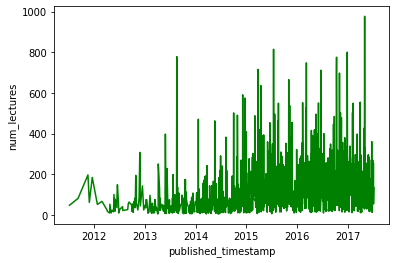

In [61]:
sns.lineplot(data=time_Series, x="published_timestamp", y="num_lectures", color="green")

In [62]:
grouped_frame_average = full_frame.groupby(['subject', 'level'])[['price', 'num_subscribers', 'num_lectures', 'num_reviews', 'content_duration_time']].mean()

In [64]:
grouped_frame_average.reset_index()

,subject,level,price,num_subscribers,num_lectures,num_reviews,content_duration_time
0,Business Finance,All Levels,75.280576,1506.774101,37.181295,57.174101,4.118259
1,Business Finance,Beginner Level,53.382353,1902.961765,27.438235,83.064706,2.827735
2,Business Finance,Expert Level,95.967742,972.451613,19.774194,37.645161,1.887742
3,Business Finance,Intermediate Level,66.054688,1127.734375,23.218750,52.789062,2.841563
4,Graphic Design,All Levels,62.701342,2309.838926,35.718121,65.288591,4.054966
5,Graphic Design,Beginner Level,53.477366,1299.411523,29.329218,64.954733,3.150782
6,Graphic Design,Expert Level,70.000000,201.600000,33.800000,11.400000,4.600000
7,Graphic Design,Intermediate Level,49.824561,1018.438596,24.368421,31.105263,2.843158
8,Musical Instruments,All Levels,55.978261,1189.021739,42.586957,60.822464,3.206341
9,Musical Instruments,Beginner Level,43.378378,1449.425676,33.601351,34.956081,2.434291


In [65]:
grouped_frame_average.corr()

,price,num_subscribers,num_lectures,num_reviews,content_duration_time
price,1.000000,0.180586,0.253665,0.276718,0.435371
num_subscribers,0.180586,1.000000,0.568159,0.891555,0.600417
num_lectures,0.253665,0.568159,1.000000,0.702413,0.819930
num_reviews,0.276718,0.891555,0.702413,1.000000,0.759030
content_duration_time,0.435371,0.600417,0.819930,0.759030,1.000000


In [66]:
new_grouped_frame.corr()

,price,num_subscribers,num_lectures,num_reviews,content_duration_time
price,1.000000,0.800708,0.967475,0.746132,0.970243
num_subscribers,0.800708,1.000000,0.887139,0.952896,0.885591
num_lectures,0.967475,0.887139,1.000000,0.866429,0.992927
num_reviews,0.746132,0.952896,0.866429,1.000000,0.876044
content_duration_time,0.970243,0.885591,0.992927,0.876044,1.000000
